In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
gdp_df = pd.read_csv('gdp_percapita.csv')

In [4]:
import os
cwd = os.getcwd() 
cwd

'C:\\Users\\VDMA Coder\\Documents\\NSS\\Python\\notebooks'

In [5]:
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


In [6]:
gdp_df.shape

(6870, 4)

In [7]:
gdp_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [8]:
gdp_df.drop (columns = gdp_df.columns[-1], inplace=True)

In [9]:
gdp_df.dtypes

Country or Area     object
Year                object
Value              float64
dtype: object

In [10]:
gdp_df.rename(columns={'Country or Area':'Country', 'Value':'GDP_Per_Capita'}, inplace=True)

In [11]:
internet_df = pd.read_csv('internet_use.csv', on_bad_lines='skip')

In [12]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [13]:
internet_df.shape

(4675, 4)

In [14]:
internet_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [15]:
internet_df.drop (columns = internet_df.columns[-1], inplace=True)

In [16]:
internet_df.dtypes

Country or Area     object
Year                object
Value              float64
dtype: object

In [17]:
internet_df.rename(columns={'Country or Area':'Country', 'Value':'Internet_Users_Pct'}, inplace=True)

In [19]:
internet_df.head(10)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
5,Afghanistan,2009,3.550000
6,Afghanistan,2008,1.840000
7,Afghanistan,2007,1.900000
8,Afghanistan,2006,2.107124
9,Afghanistan,2005,1.224148


In [20]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on = ['Country', 'Year'])
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,6.390000
1,Afghanistan,2013,2116.465454,5.900000
2,Afghanistan,2012,2075.491747,5.454545
3,Afghanistan,2011,1904.559799,5.000000
4,Afghanistan,2010,1957.029338,4.000000
...,...,...,...,...
3454,Zimbabwe,1996,3520.430146,0.016790
3455,Zimbabwe,1995,3226.413930,0.007684
3456,Zimbabwe,1994,3263.934978,0.001739
3457,Zimbabwe,1990,3324.348171,0.000000


In [38]:
gdp_internet_subset = gdp_and_internet_use.query('Year == ["2004", "2009", "2014"]')
gdp_internet_subset.tail(6)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3414,Zambia,2014,3450.046561,17.340000
3419,Zambia,2009,2917.516220,6.310000
3424,Zambia,2004,2261.766537,2.013550
3436,Zimbabwe,2014,2955.240287,19.890000
3441,Zimbabwe,2009,1925.364381,11.360000
3446,Zimbabwe,2004,2480.859342,6.564045


In [40]:
gdpin_2004 = gdp_internet_subset[(gdp_internet_subset['Year'] == '2004')]
gdpin_2004.head(6)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10,Afghanistan,2004,1200.278256,0.105809
23,Albania,2004,7604.838002,2.420388
44,Algeria,2004,10058.435939,4.634475
66,Angola,2004,5593.241537,0.464815
86,Antigua and Barbuda,2004,18745.681534,24.266544
107,Argentina,2004,18032.610491,16.036684


In [44]:
gdpin_2004.sort_values('Internet_Users_Pct', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2985,Sweden,2004,44496.023401,83.890000
1391,Iceland,2004,45145.545658,83.880000
864,Denmark,2004,50607.628971,80.930000
2306,Norway,2004,60893.410993,77.690000
1063,Finland,2004,43760.279146,72.390000
...,...,...,...,...
1019,Ethiopia,2004,793.093786,0.155335
10,Afghanistan,2004,1200.278256,0.105809
3035,Tajikistan,2004,1737.743630,0.077480
1759,Liberia,2004,1181.546158,0.031011


In [45]:
gdpin_2004.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1808,Luxembourg,2004,102708.212547,65.880000
3290,United Arab Emirates,2004,97758.023345,30.131296
2552,Qatar,2004,93748.301216,20.701648
382,Bermuda,2004,90195.811033,60.990867
2648,San Marino,2004,80391.828516,50.566343
...,...,...,...,...
2266,Niger,2004,929.883920,0.189934
550,Burundi,2004,817.460585,0.349060
1019,Ethiopia,2004,793.093786,0.155335
2112,Mozambique,2004,792.727155,0.679448


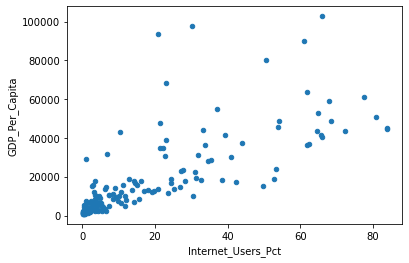

In [59]:
gdpin_2004.plot(kind='scatter', x='Internet_Users_Pct', y='GDP_Per_Capita');

In [46]:
gdpin_2009 = gdp_internet_subset[(gdp_internet_subset['Year'] == '2009')]
gdpin_2009.head(6)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2009,1758.904043,3.55
18,Albania,2009,10346.864199,41.20
39,Algeria,2009,10782.361398,11.23
61,Angola,2009,7643.493749,6.00
81,Antigua and Barbuda,2009,20046.839017,42.00
102,Argentina,2009,21519.892554,34.00


In [49]:
gdpin_2009.sort_values('Internet_Users_Pct', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1386,Iceland,2009,48177.084123,93.000000
2301,Norway,2009,61886.564498,92.080000
2980,Sweden,2009,45638.035577,91.000000
2190,Netherlands,2009,51772.424928,89.630000
1803,Luxembourg,2009,104932.811953,87.310000
...,...,...,...,...
1014,Ethiopia,2009,1150.206179,0.540000
570,Cambodia,2009,2603.583778,0.530000
2733,Sierra Leone,2009,1372.392285,0.260000
2127,Myanmar,2009,2874.780227,0.220000


In [52]:
gdpin_2009.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1803,Luxembourg,2009,104932.811953,87.31
377,Bermuda,2009,89961.982744,83.25
2547,Qatar,2009,89954.519993,53.10
2643,San Marino,2009,76736.328963,54.21
632,Cayman Islands,2009,70300.334857,64.50
...,...,...,...,...
1014,Ethiopia,2009,1150.206179,0.54
2261,Niger,2009,992.409977,0.76
2107,Mozambique,2009,991.323181,2.68
1847,Malawi,2009,932.867635,1.07


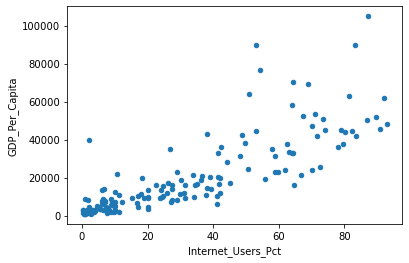

In [58]:
gdpin_2009.plot(kind='scatter', x='Internet_Users_Pct', y='GDP_Per_Capita');

In [47]:
gdpin_2014 = gdp_internet_subset[(gdp_internet_subset['Year'] == '2014')]
gdpin_2014.head(6)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,6.39
13,Albania,2014,11623.866679,60.10
34,Algeria,2014,11512.705405,18.09
56,Angola,2014,8239.828837,21.26
76,Antigua and Barbuda,2014,18104.241470,64.00
97,Argentina,2014,23550.099061,64.70


In [50]:
gdpin_2014.sort_values('Internet_Users_Pct', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1381,Iceland,2014,49652.149500,98.16
372,Bermuda,2014,77361.104881,96.80
2296,Norway,2014,62589.373548,96.30
854,Denmark,2014,52214.537753,95.99
1798,Luxembourg,2014,108760.916030,94.67
...,...,...,...,...
2122,Myanmar,2014,4020.037369,2.10
2256,Niger,2014,1127.615541,1.95
1261,Guinea,2014,2061.760973,1.72
540,Burundi,2014,886.235777,1.38


In [51]:
gdpin_2014.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1798,Luxembourg,2014,108760.916030,94.67
2542,Qatar,2014,95578.416973,91.49
2751,Singapore,2014,87808.663157,82.00
372,Bermuda,2014,77361.104881,96.80
627,Cayman Islands,2014,66207.447230,74.10
...,...,...,...,...
3098,Togo,2014,1404.132938,5.70
2102,Mozambique,2014,1217.090210,5.94
2256,Niger,2014,1127.615541,1.95
1842,Malawi,2014,1027.208496,5.83


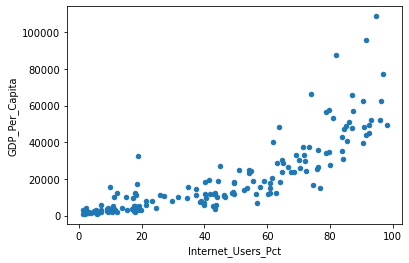

In [57]:
gdpin_2014.plot(kind='scatter', x='Internet_Users_Pct', y='GDP_Per_Capita');

In [60]:
top_5_internet = gdp_internet_subset.query('Country == ["Iceland", "Bermuda", "Norway", "Denmark", "Luxembourg"]')
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
372,Bermuda,2014,77361.104881,96.800000
377,Bermuda,2009,89961.982744,83.250000
382,Bermuda,2004,90195.811033,60.990867
854,Denmark,2014,52214.537753,95.990000
859,Denmark,2009,50274.075696,86.840000
864,Denmark,2004,50607.628971,80.930000
1381,Iceland,2014,49652.149500,98.160000
1386,Iceland,2009,48177.084123,93.000000
1391,Iceland,2004,45145.545658,83.880000
1798,Luxembourg,2014,108760.916030,94.670000


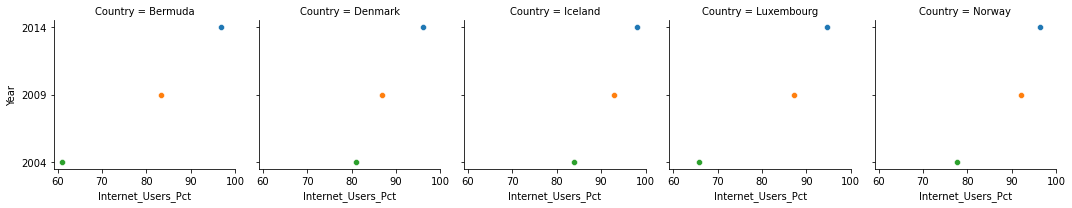

In [67]:
g = sns.FacetGrid(top_5_internet, col='Country', hue='Year')
g.map_dataframe(sns.scatterplot, x="Internet_Users_Pct", y="Year")
plt.show()

In [ ]:
g.map(sns.scatterplot, 'GDP_Per_Capita', 'Internet_Users_Pct')